# Spotify Recommendation System Project

**Intreoduction** -- Spotify dataset collected includes about 1 Million tracks with 19 features between 2000 and 2023. Also, there is a total of 61,445 unique artists and 82 genres in the data.

Dataset is taken from Kaggle website

# Import Necessary Libraries

In [2]:
!pip install yellowbrick

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import os
import numpy as np
import pandas as pd
import datetime

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 


#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Progreebar
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split

# Data Preperation

In [3]:
spotify_df = pd.read_csv('spotify_data.csv')
spotify_df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


# Data Analysis

In [4]:
spotify_df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [6]:
spotify_df.isnull().sum()

Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [7]:
spotify_df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

# Data Cleaning

In [8]:
#Convert Milli secs duration into minutes

spotify_df['duration_min'] = spotify_df['duration_ms']/60000
spotify_df['duration_min'] = spotify_df['duration_min'].round(2)

spotify_df['duration_min'].head()

0    4.00
1    3.61
2    2.65
3    5.07
4    4.07
Name: duration_min, dtype: float64

In [9]:
spotify_df = spotify_df.drop(labels=['duration_ms'], axis=1)

# Drop Duplicates

In [10]:
spotify_df.duplicated().any().sum()

0

In [11]:
spotify_df = spotify_df.drop(labels=['track_id', 'Unnamed: 0'], axis=1)
spotify_df.shape

(1159764, 18)

In [12]:
spotify_df.duplicated().sum()

0

**Observation** -- there are not any duplicates in the data set even after removing the track_id column. This step is taken because It's possible that duplicates were not immediately apparent before dropping the id column because the id column contained unique identifiers that made each row appear distinct. However, after removing the id column, the duplicate rows became apparent because there were other rows with identical values in the remaining columns (artists, name, etc.). so it is just for checking

In [13]:
spotify_df.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,3,4.00
1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,3.61
2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,4,2.65
3,Boyce Avenue,Fast Car,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,4,5.07
4,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,4,4.07


# Data Visualization

<Axes: xlabel='instrumentalness', ylabel='Density'>

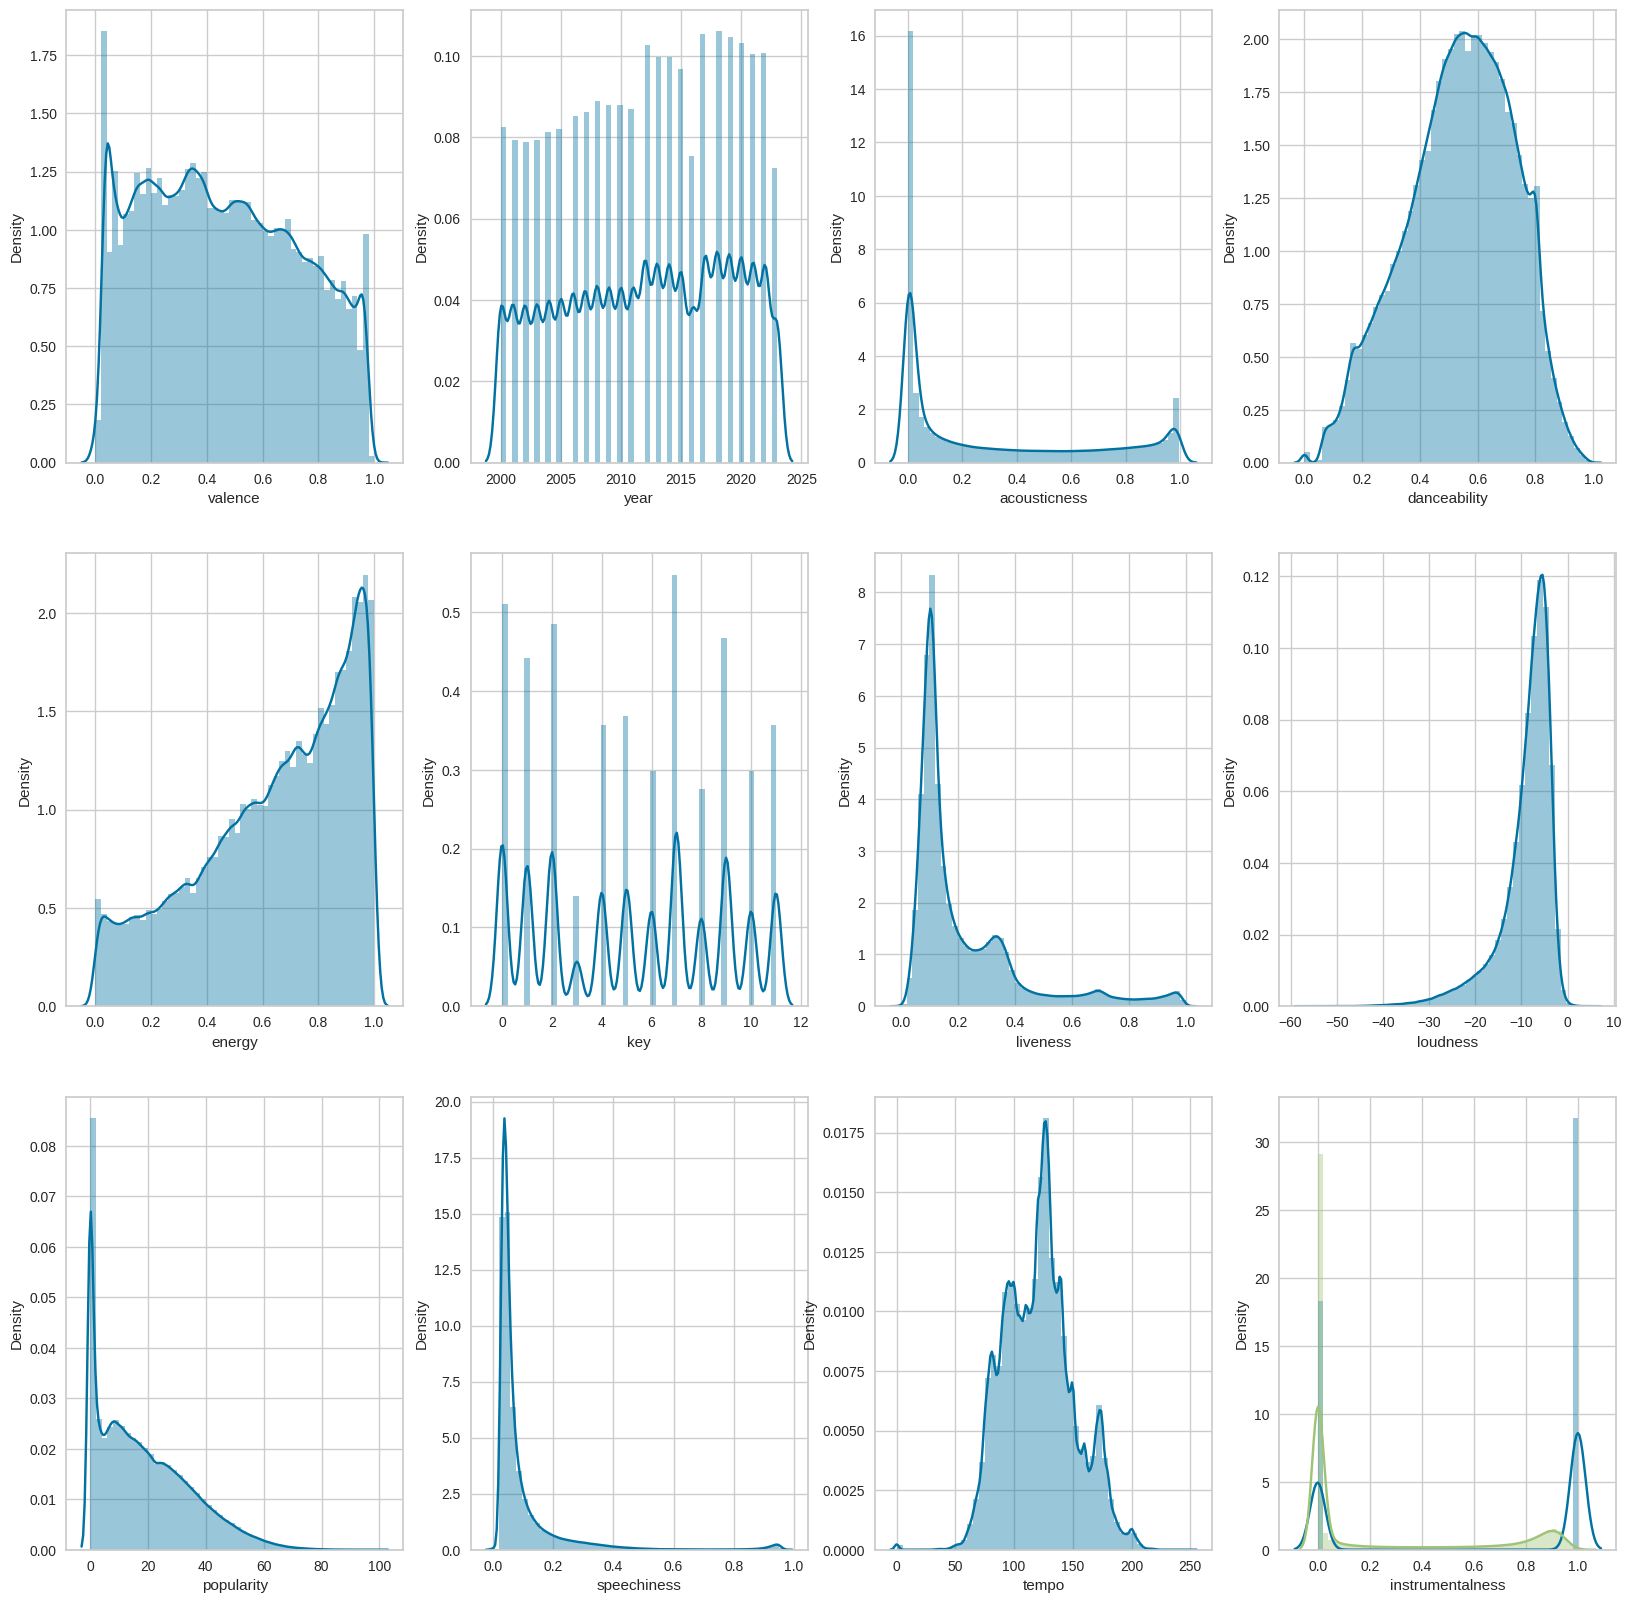

In [14]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(spotify_df['valence'],ax=ax[0,0])
sns.distplot(spotify_df['year'],ax=ax[0,1])
sns.distplot(spotify_df['acousticness'],ax=ax[0,2])
sns.distplot(spotify_df['danceability'],ax=ax[0,3])
sns.distplot(spotify_df['energy'],ax=ax[1,0])
sns.distplot(spotify_df['key'],ax=ax[1,1])
sns.distplot(spotify_df['liveness'],ax=ax[1,2])
sns.distplot(spotify_df['loudness'],ax=ax[1,3])
sns.distplot(spotify_df['popularity'],ax=ax[2,0])
sns.distplot(spotify_df['speechiness'],ax=ax[2,1])
sns.distplot(spotify_df['tempo'],ax=ax[2,2])
sns.distplot(spotify_df['mode'],ax=ax[2,3])
sns.distplot(spotify_df['instrumentalness'],ax=ax[2,3])

In [15]:
# drop the string columns to be able to use correlation matrix and assign it to a new variable
columns_to_drop = ['artist_name', 'track_name', 'genre']
spotify_df1 = spotify_df.drop(columns=columns_to_drop)

In [16]:
spotify_df1.head()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
0,68,2012,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,3,4.00
1,50,2012,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,3.61
2,57,2012,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,4,2.65
3,58,2012,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,4,5.07
4,54,2012,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,4,4.07


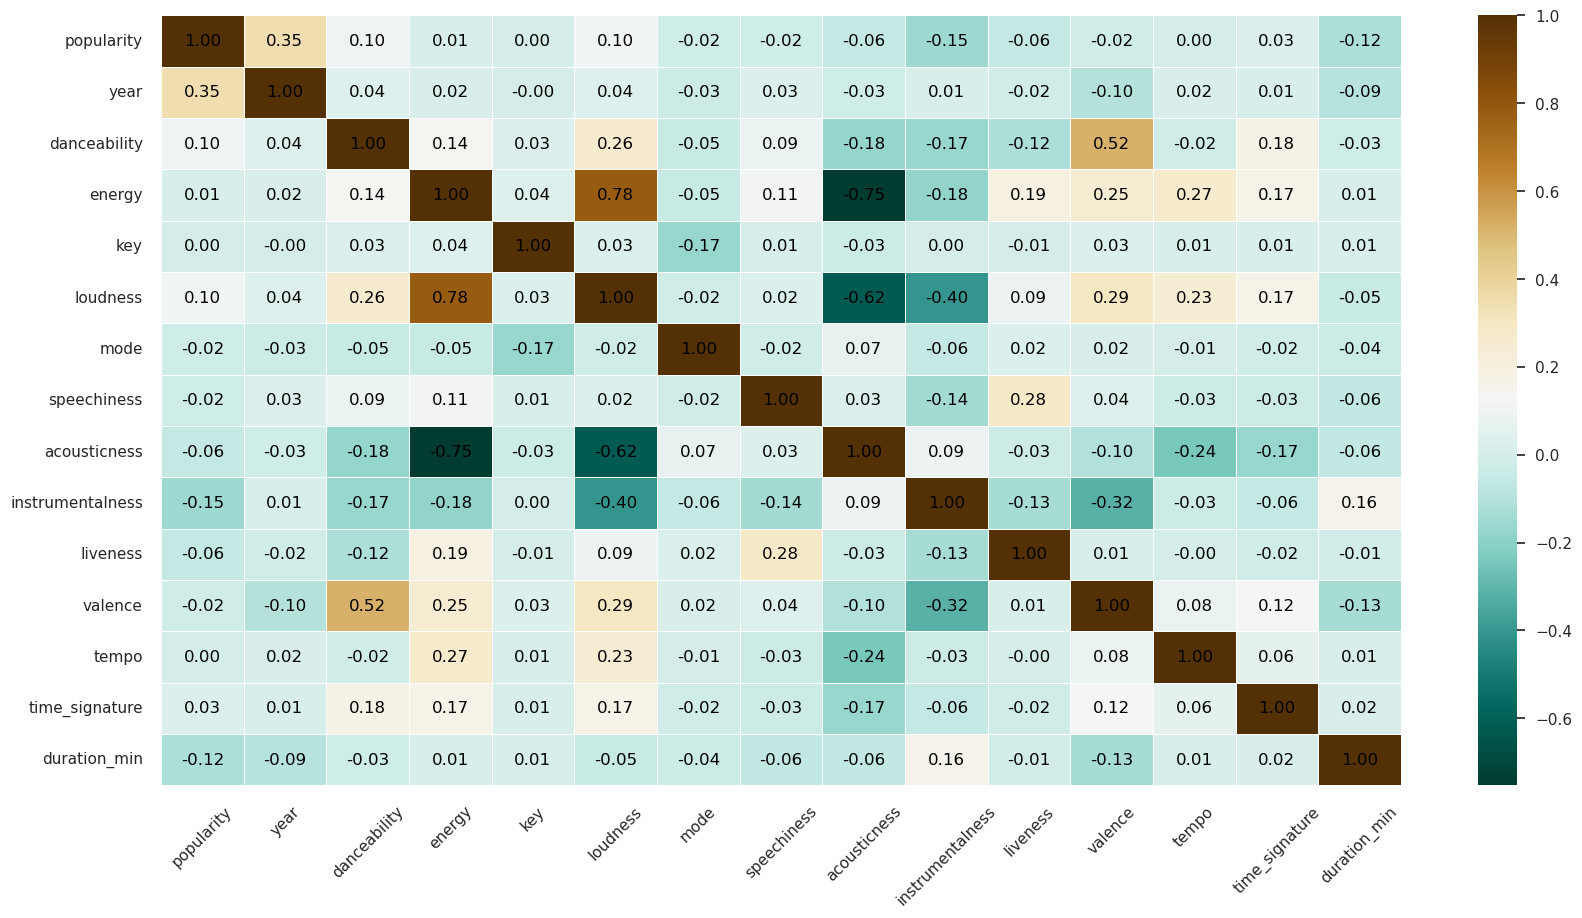

In [17]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
corr = spotify_df1.corr()

# Plot heatmap
sns.heatmap(corr, cmap='BrBG_r', annot_kws={"fontsize": 12}, linewidths=.5)

# Add annotations manually
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(corr.iloc[i, j]), ha='center', va='center', color='black')

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [18]:
#identifying highly correlated pairs
corr_matrix = spotify_df1.corr()
corr_pairs = corr_matrix.unstack()
positive_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Highly Correlated Pairs: \n", positive_corr)


negative_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nLess Correlated Pairs: \n", negative_corr)

Highly Correlated Pairs: 
 danceability  valence         0.519900
energy        loudness        0.781006
loudness      energy          0.781006
valence       danceability    0.519900
dtype: float64

Less Correlated Pairs: 
 energy        acousticness   -0.752662
loudness      acousticness   -0.621698
acousticness  energy         -0.752662
              loudness       -0.621698
dtype: float64


**Observation** -- From the correlation table provided, we can glean valuable insights into the attributes that contribute to a song's popularity.

Firstly, it's evident that the release year strongly correlates with popularity. This aligns with the algorithm behind Spotify's popularity metric, which factors in both the number of streams and their recency.

Furthermore, the relationship between loudness and energy is noteworthy. Higher energy levels often coincide with louder volumes, indicating a correlation between the two.

Acousticness exhibits negative correlations with energy, loudness, and year. This implies that songs with less acoustic instrumentation tend to fare better in terms of energy, volume, and recency of release.

The positive correlation between valence and danceability is notable. Dance-oriented songs, typically characterized by higher valence and a major key, tend to be more popular.

Interestingly, acousticness appears to have no significant correlation with popularity. This suggests that songs featuring electronic or electric instruments dominate the charts, while purely acoustic compositions rarely achieve widespread popularity.

In summary, the data suggests that artists aiming for maximum popularity should consider crafting high-energy compositions featuring electronic or electric instrumentation.


# Most Popular Tracks & Artists

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

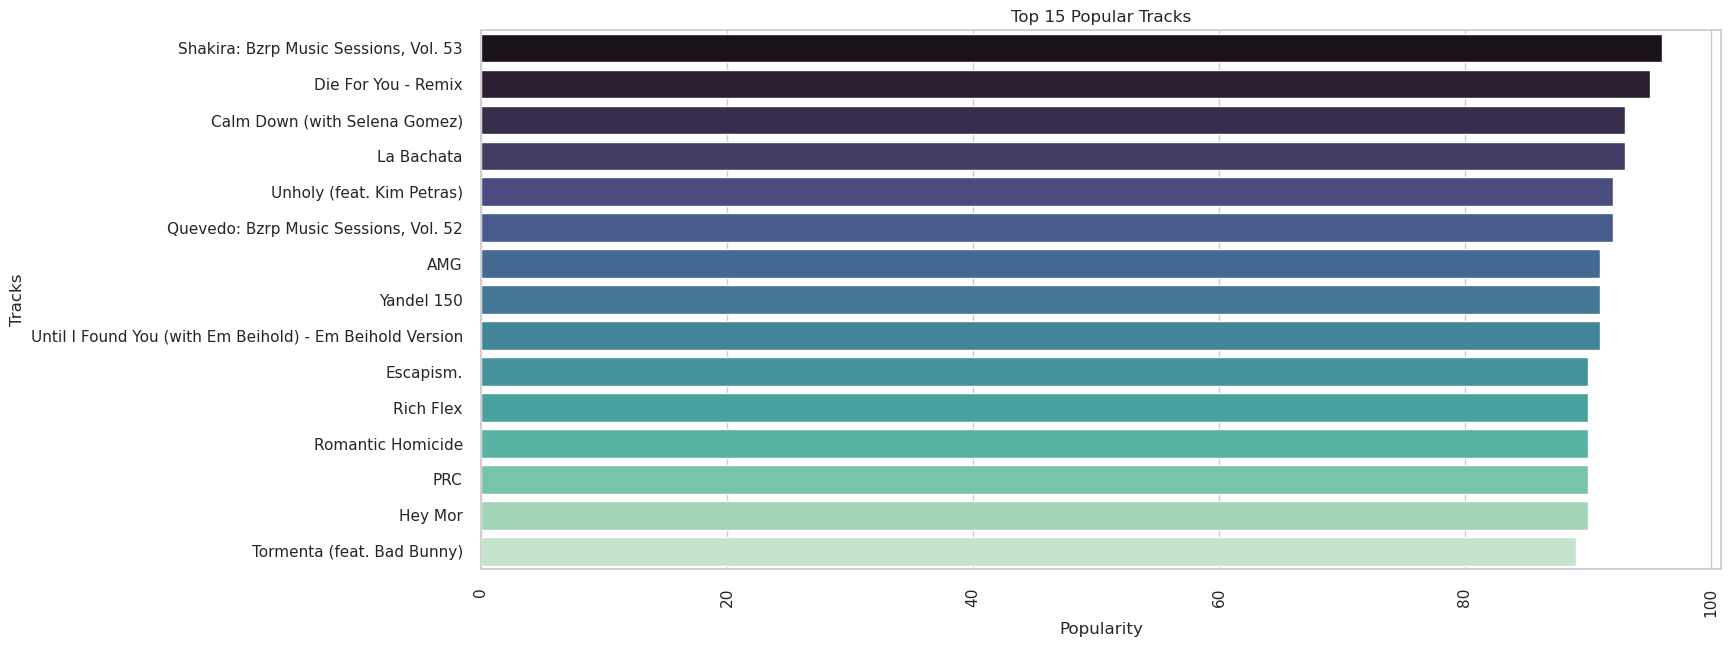

In [19]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize=(16, 7))
popular = spotify_df.groupby("track_name")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(x=popular, y=popular.index, palette="mako", orient='h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Tracks')
axis.set_xlabel('Popularity')
plt.xticks(rotation=90)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000')])

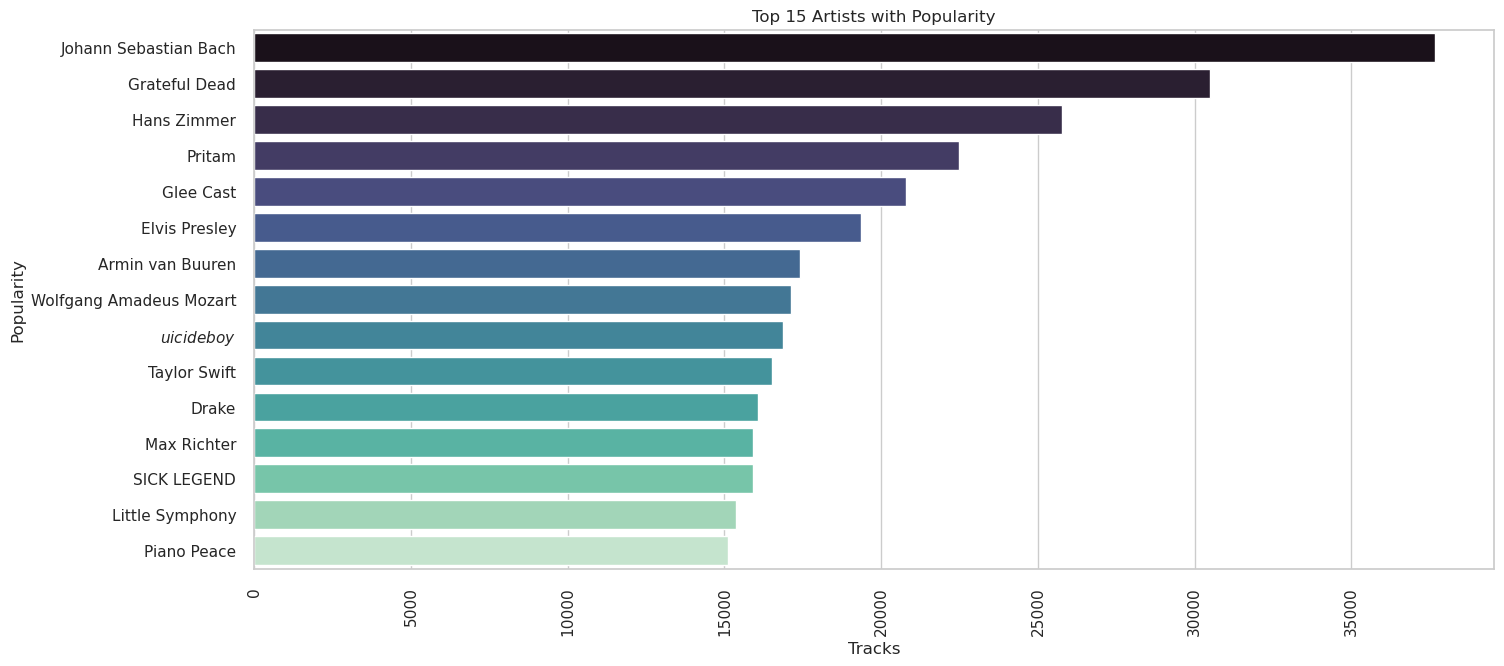

In [20]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = spotify_df.groupby("artist_name")['popularity'].sum().sort_values(ascending=False)[:15]
axis = sns.barplot(x=popular,y=popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

# Audio Characteristics Over Years

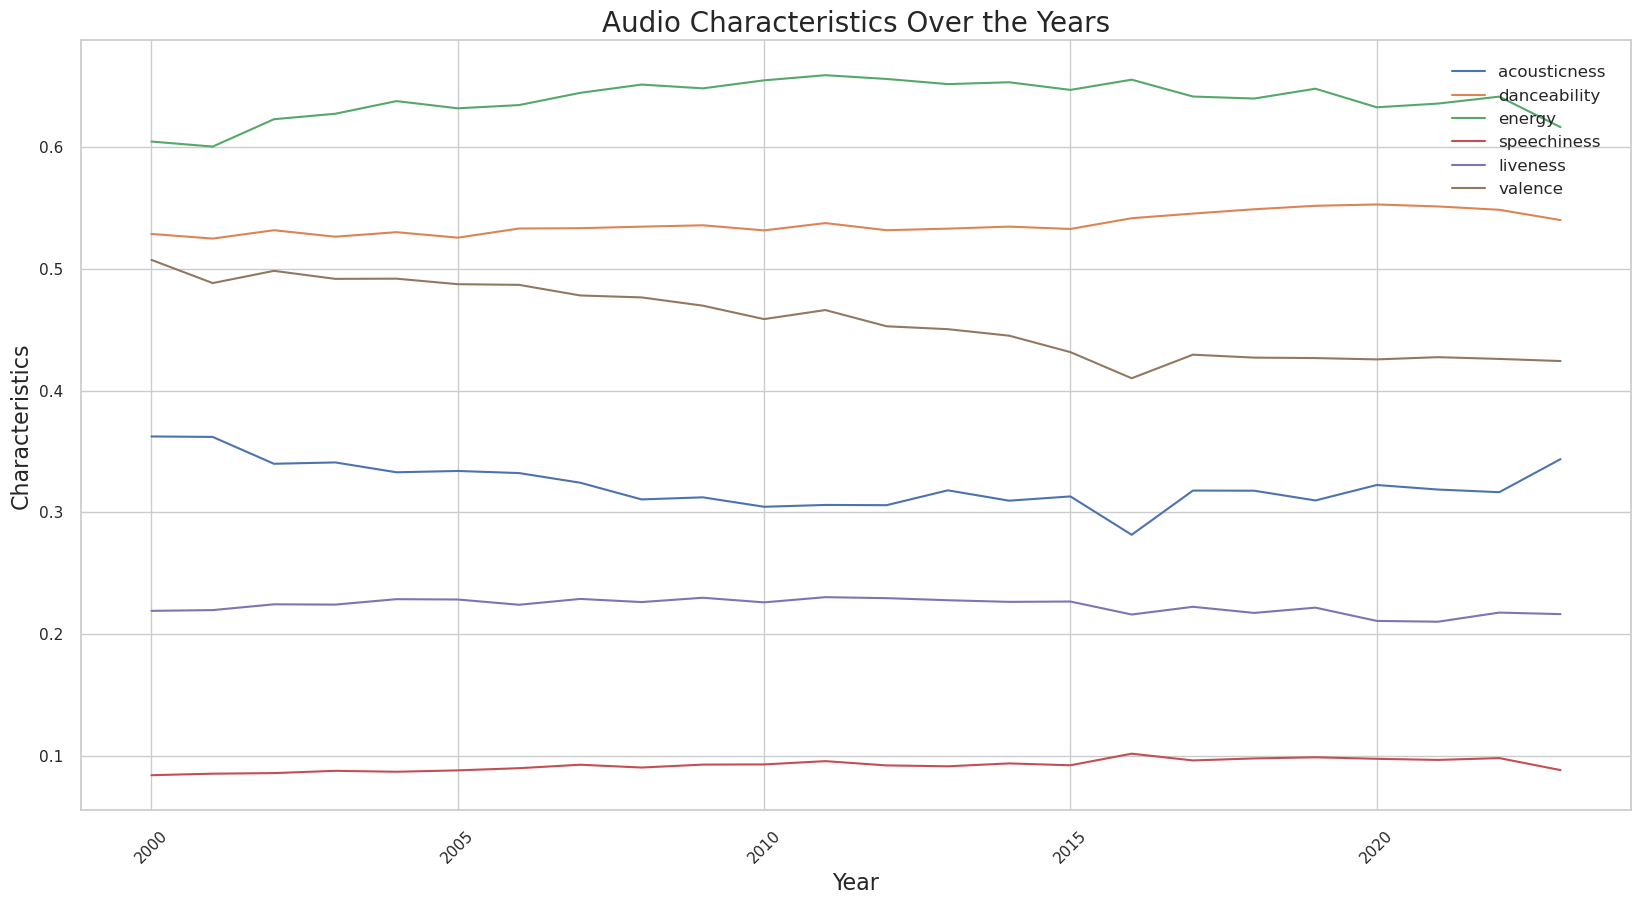

In [21]:
# Define columns to plot
columns = ["acousticness", "danceability", "energy", "speechiness", "liveness", "valence"]

# Set the figure size
plt.figure(figsize=(20, 10))

# Iterate through each column
for c in columns:
    # Calculate the mean of the column for each year
    x = spotify_df.groupby('year')[c].mean()
    # Plot the line for the current column
    sns.lineplot(data=x, x=x.index, y=x.values, label=c)

# Set the title and labels
plt.title('Audio Characteristics Over the Years', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Characteristics', fontsize=16)

# Adjust legend properties
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 12}, loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


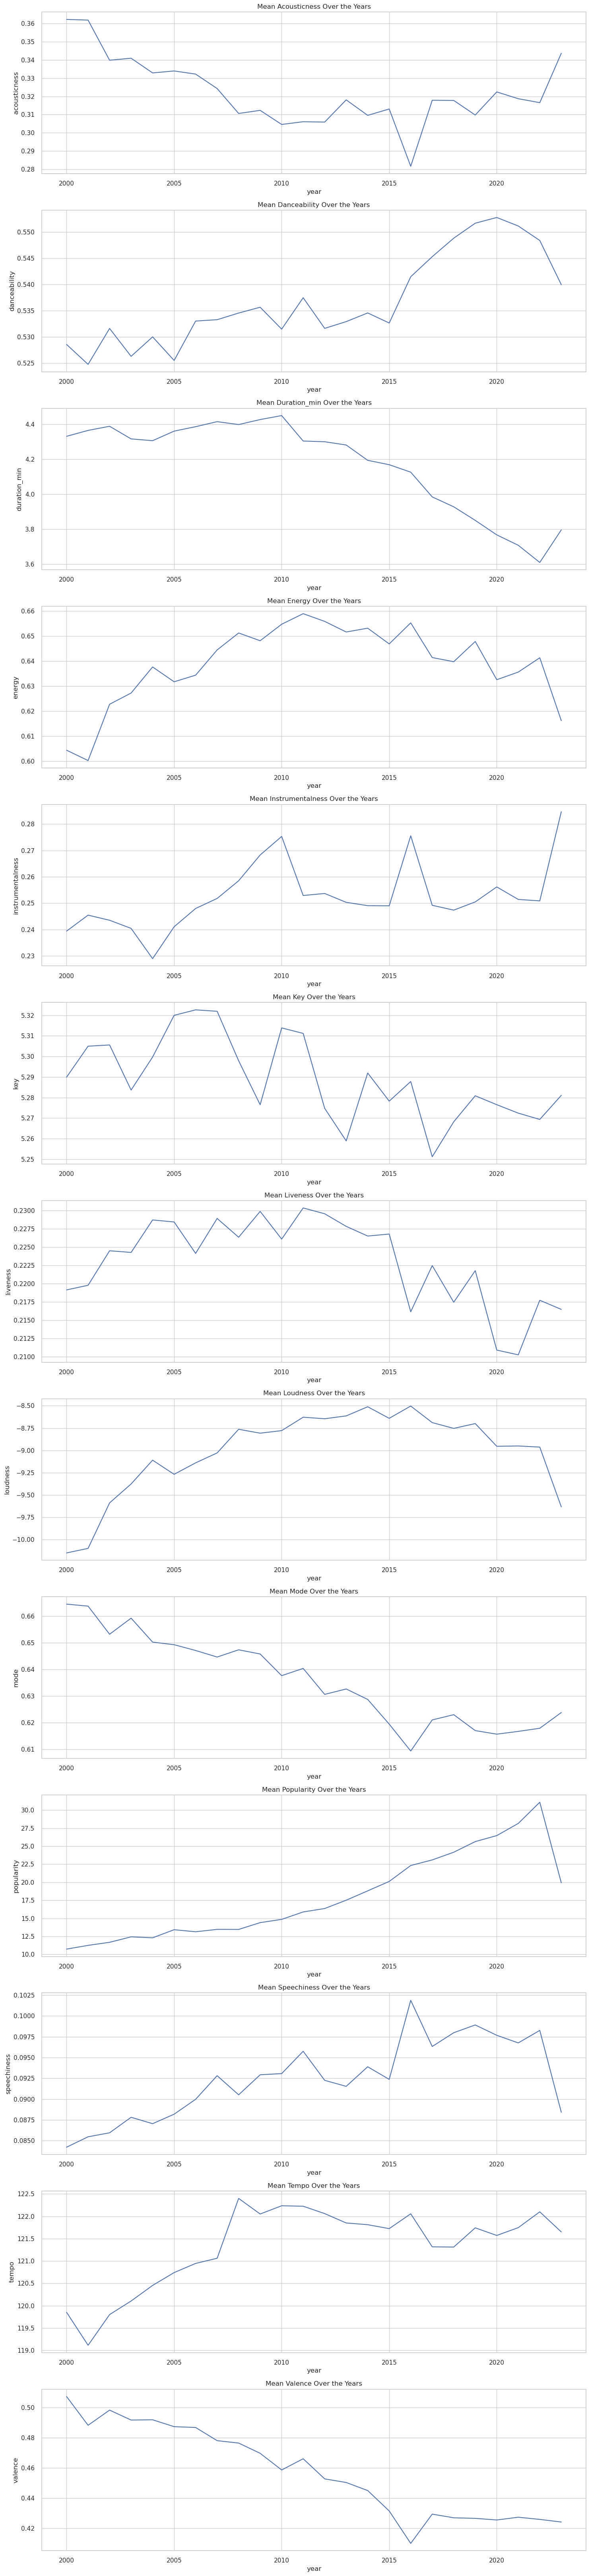

In [22]:
columns = ['acousticness', 'danceability', 'duration_min', 'energy',
           'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
           'popularity', 'speechiness', 'tempo', 'valence']

# Create a single figure with multiple subplots
fig, axes = plt.subplots(nrows=len(columns), figsize=(15, 5*len(columns)))

# Loop over each column
for i, col in enumerate(columns):
    # Calculate the mean of the column for each year
    y = spotify_df.groupby('year')[col].mean()
    x = y.index
    
    # Plot the line for the current column on the corresponding subplot
    sns.lineplot(x=x, y=y, ax=axes[i])
    
    # Set title for the subplot
    axes[i].set_title(f'Mean {col.capitalize()} Over the Years')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Number of Songs Added Every Year

year = pd.DataFrame(spotify_df['year'].value_counts())
year = year.sort_index()
ay=year.plot(kind='line',figsize=(15,8) ,color='#6f4a8e', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
ay.axes.get_xaxis().set_visible(True)

# ML Modelling

We need to design a Ml model, in order to begin, firstly, we need to make feature selection. In order to select the features for the model I am using YellowbrickFeature Correlation Visualizer.

The Feature Correlation Visualizer employs both Pearson correlation coefficients and mutual information to gauge the relationships between features and the target variable. This tool serves as a valuable aid in feature selection by pinpointing features that exhibit significant correlation or substantial mutual information with the target variable.

# Feature Selection

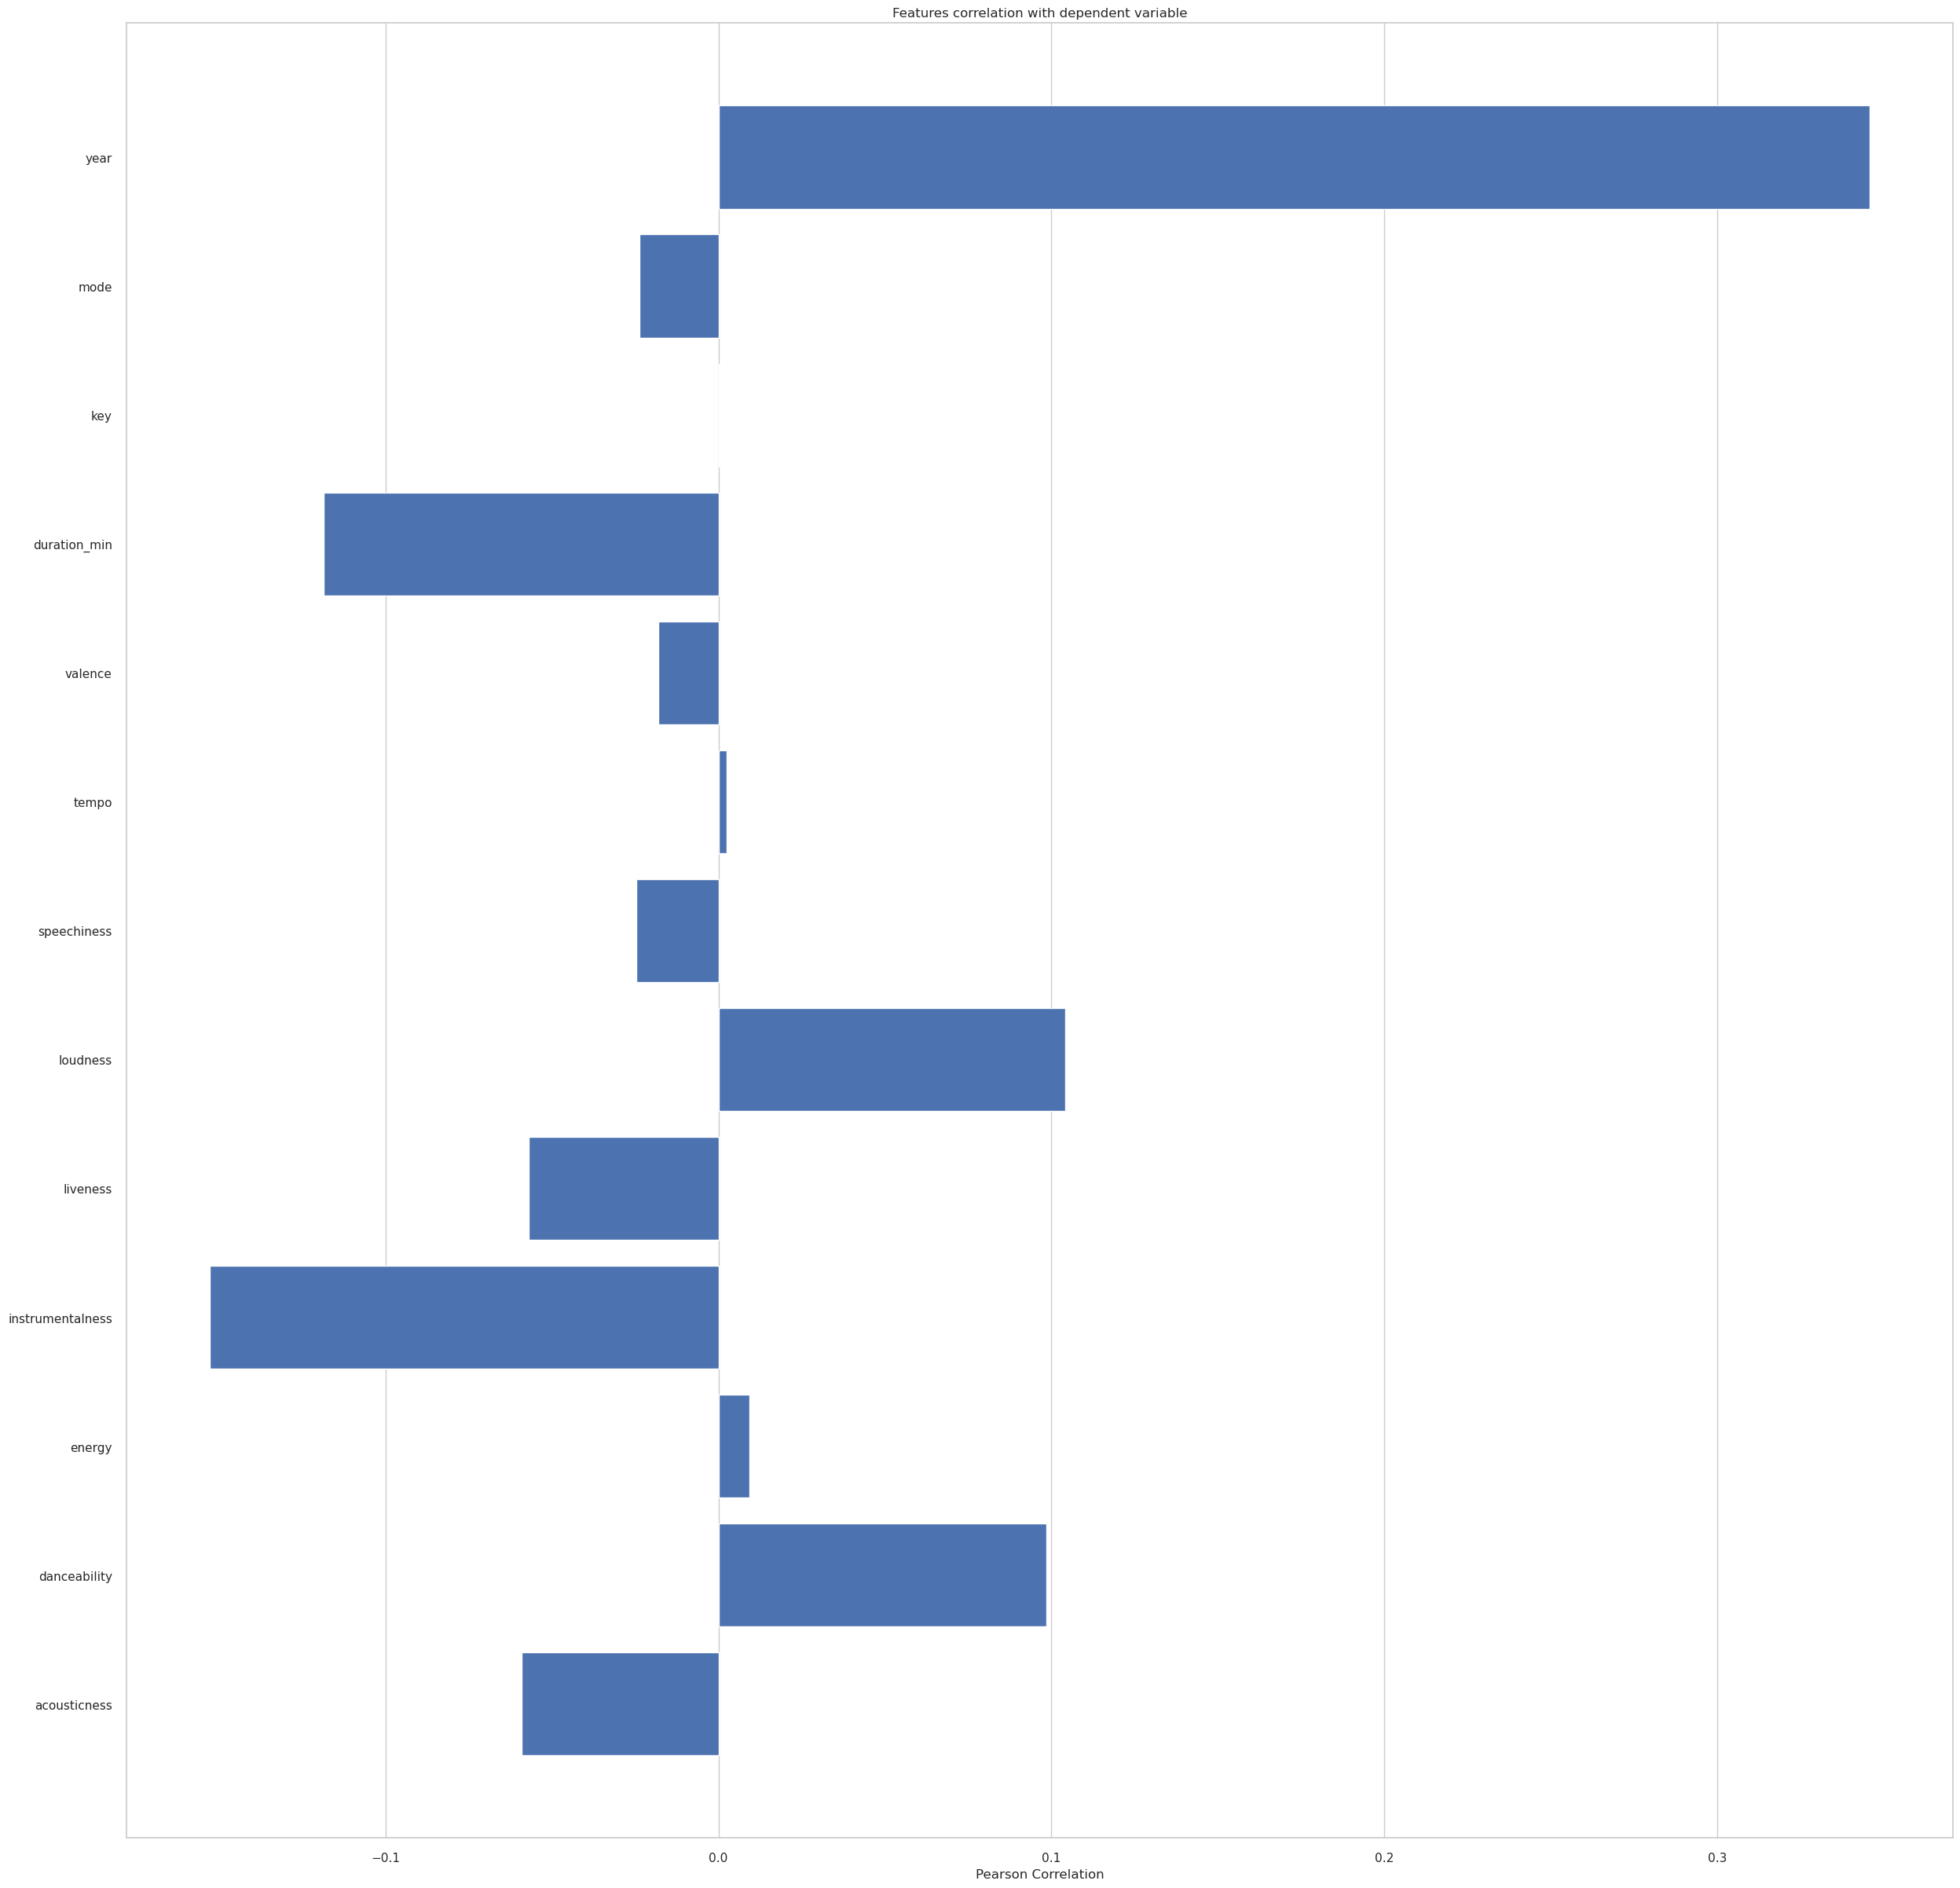

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [23]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_min','key','mode','year']

X, y = spotify_df[feature_names], spotify_df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(30,30)
visualizer.fit(X, y)       
visualizer.show()  

**Observation** -- From the above graph it is clear that 8 features with negative correlation and 5 features with positive correlation

In [24]:
#splitting data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(spotify_df.drop('popularity', axis=1), spotify_df['popularity'], test_size = 0.2, random_state = 42)
X_train.head() # we set the popularity as our target variable

,artist_name,track_name,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
931854,Kenny Bee,別恨離愁,2007,cantopop,0.634,0.254,8,-11.718,1,0.0273,0.828000,0.000001,0.1120,0.330,82.857,4,3.76
892251,Demarkus Lewis,Don't Test Me,2006,deep-house,0.848,0.526,10,-13.655,0,0.0892,0.000032,0.069300,0.0847,0.238,125.988,4,6.51
486917,Sam Tallent,Money,2021,comedy,0.457,0.816,11,-7.867,1,0.6360,0.926000,0.000120,0.9430,0.697,126.573,3,0.79
1126450,London Elektricity,Yikes!,2011,drum-and-bass,0.492,0.968,2,-3.781,1,0.1230,0.001910,0.835000,0.2020,0.355,173.000,4,6.89
171470,Steve Hofstetter,Seeing Red,2015,comedy,0.440,0.523,2,-19.562,0,0.9040,0.857000,0.000000,0.9510,0.304,76.456,4,2.82


# Feature Transformation

object data of the artist_name and track_name with some numerical indicator that identify them.

In [25]:
spotify_df.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,3,4.00
1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,3.61
2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,4,2.65
3,Boyce Avenue,Fast Car,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,4,5.07
4,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,4,4.07


In [26]:
class ArtistTransformer:
    """
    Transformer to convert artist names into ordinal float values based on their mean popularity.
    
    Parameters:
    -----------
    min_count : int, optional
        Minimal threshold of artist appearances in dataset. Artists with appearances below this threshold will be replaced 
        with the overall mean popularity. Default is 3.
    max_count : int, optional
        Maximal threshold of artist appearances in dataset. Artists with appearances above this threshold will be replaced 
        with 0. Default is 600.
    
    Attributes:
    -----------
    artist_df : pandas DataFrame
        DataFrame containing mean popularity and count of appearances for each artist.
    overall_mean : float
        Overall mean popularity of all artists.
    """
    def __init__(self, min_count=3, max_count=600):
        self.min_count = min_count
        self.max_count = max_count
        self.artist_df = None
        self.overall_mean = None
    
    def fit(self, X, y):
        self.artist_df = y.groupby(X).agg(['mean', 'count'])
        self.artist_df.loc[self.artist_df['count'] <= self.min_count, 'mean'] = y.mean()
        self.artist_df.loc[self.artist_df['count'] >= self.max_count, 'mean'] = 0
        self.overall_mean = y.mean()
        return self
    
    def transform(self, X):
        X_transformed = X.map(self.artist_df['mean']).fillna(self.overall_mean)
        return X_transformed


class TrackTransformer:
    """
    Transformer to convert track names into ordinal float values based on their mean popularity.
    
    Parameters:
    -----------
    min_count : int, optional
        Minimal threshold of track appearances in dataset. Tracks with appearances below this threshold will be replaced 
        with the overall mean popularity. Default is 3.
    max_count : int, optional
        Maximal threshold of track appearances in dataset. Tracks with appearances above this threshold will be replaced 
        with 0. Default is 600.
    
    Attributes:
    -----------
    track_df : pandas DataFrame
        DataFrame containing mean popularity and count of appearances for each track.
    overall_mean : float
        Overall mean popularity of all tracks.
    """
    def __init__(self, min_count=3, max_count=600):
        self.min_count = min_count
        self.max_count = max_count
        self.track_df = None
        self.overall_mean = None
    
    def fit(self, X, y):
        self.track_df = y.groupby(X).agg(['mean', 'count'])
        self.track_df.loc[self.track_df['count'] <= self.min_count, 'mean'] = y.mean()
        self.track_df.loc[self.track_df['count'] >= self.max_count, 'mean'] = 0
        self.overall_mean = y.mean()
        return self
    
    def transform(self, X):
        X_transformed = X.map(self.track_df['mean']).fillna(self.overall_mean)
        return X_transformed

now, we are going to eliminate zeroes in tempo and replace it and standardizing Instrumental Criteria with numeric values.

In [27]:
def instrumental(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))
    
    
class Tempo():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X

In [28]:
# Instantiate ArtistTransformer and TrackTransformer
artist_transformer = ArtistTransformer(min_count=2)
track_transformer = TrackTransformer(min_count=2)

# Fit and transform on training data
X_train['artist_name'] = artist_transformer.fit(X_train['artist_name'], y_train).transform(X_train['artist_name'])
X_train['track_name'] = track_transformer.fit(X_train['track_name'], y_train).transform(X_train['track_name'])

# Transform on test data
X_test['artist_name'] = artist_transformer.transform(X_test['artist_name'])
X_test['track_name'] = track_transformer.transform(X_test['track_name'])

#Apply Instrumental Criteria on train & test seperately
instrumentalness_tranformer = FunctionTransformer(instrumental)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

#Apply Tempo Transformer class on Train & Test seperately
tempo_transformer = Tempo()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)

# One Hot Encoder

In [29]:
X_train.head()

,artist_name,track_name,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
931854,1.750000,18.377812,2007,cantopop,0.634,0.254,8,-11.718,1,0.0273,0.828000,1,0.1120,0.330,82.857,4,3.76
892251,3.820896,18.377812,2006,deep-house,0.848,0.526,10,-13.655,0,0.0892,0.000032,1,0.0847,0.238,125.988,4,6.51
486917,5.933333,22.843750,2021,comedy,0.457,0.816,11,-7.867,1,0.6360,0.926000,1,0.9430,0.697,126.573,3,0.79
1126450,9.276596,18.377812,2011,drum-and-bass,0.492,0.968,2,-3.781,1,0.1230,0.001910,2,0.2020,0.355,173.000,4,6.89
171470,9.431579,21.375000,2015,comedy,0.440,0.523,2,-19.562,0,0.9040,0.857000,1,0.9510,0.304,76.456,4,2.82


In [30]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_train['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_train['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['key','instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_test['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_test['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['key','instrumentalness'], axis=1)

In [31]:
# Initialize OneHotEncoder for genre
genre_ohe = OneHotEncoder(categories='auto', drop='first')

# Train
genre_feature_arr = genre_ohe.fit_transform(X_train[['genre']]).toarray()
genre_categories = genre_ohe.categories_[0][1:]  # Extract genre categories from OneHotEncoder
genre_columns = [f'genre_{cat}' for cat in genre_categories]
genre_features = pd.DataFrame(genre_feature_arr, columns=genre_columns, index=X_train.index)
X_train = pd.concat([X_train, genre_features], axis=1).drop(['genre'], axis=1)

# Test
genre_feature_arr = genre_ohe.transform(X_test[['genre']]).toarray()
genre_features = pd.DataFrame(genre_feature_arr, columns=genre_columns, index=X_test.index)
X_test = pd.concat([X_test, genre_features], axis=1).drop(['genre'], axis=1)


In [32]:
X_train.head()

,artist_name,track_name,year,danceability,energy,loudness,mode,speechiness,acousticness,liveness,...,genre_ska,genre_sleep,genre_songwriter,genre_soul,genre_spanish,genre_swedish,genre_tango,genre_techno,genre_trance,genre_trip-hop
931854,1.750000,18.377812,2007,0.634,0.254,-11.718,1,0.0273,0.828000,0.1120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
892251,3.820896,18.377812,2006,0.848,0.526,-13.655,0,0.0892,0.000032,0.0847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486917,5.933333,22.843750,2021,0.457,0.816,-7.867,1,0.6360,0.926000,0.9430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1126450,9.276596,18.377812,2011,0.492,0.968,-3.781,1,0.1230,0.001910,0.2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171470,9.431579,21.375000,2015,0.440,0.523,-19.562,0,0.9040,0.857000,0.9510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MinMax Scalar

In [33]:
scaler = MinMaxScaler()
cols = ['artist_name','track_name','duration_min','loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [34]:
X_train.head()

,artist_name,track_name,year,danceability,energy,loudness,mode,speechiness,acousticness,liveness,...,genre_ska,genre_sleep,genre_songwriter,genre_soul,genre_spanish,genre_swedish,genre_tango,genre_techno,genre_trance,genre_trip-hop
931854,0.020735,0.282736,2007,0.634,0.254,0.721652,1,0.0273,0.828000,0.1120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
892251,0.045271,0.282736,2006,0.848,0.526,0.691514,0,0.0892,0.000032,0.0847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486917,0.070300,0.351442,2021,0.457,0.816,0.781569,1,0.6360,0.926000,0.9430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1126450,0.109912,0.282736,2011,0.492,0.968,0.845143,1,0.1230,0.001910,0.2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171470,0.111749,0.328846,2015,0.440,0.523,0.599608,0,0.9040,0.857000,0.9510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

# Model Building

In [36]:
def Decision_tree(X_train,y_train,X_test,y_test,min_samples_split,max_leaf_nodes):
    """
    Design ML model and returns r2-score and Mean squared Error for Train and Test Datasets
    
    INPUT:
    :param X_train: 
    :param y_train: 
    :param X_test: 
    :param y_test: 
    :param min_samples_split: 
    :param max_leaf_nodes: 
    OUTPUT:
    train_rmse - Root Mean Squared Error for Train dataset
    test_rmse - Root Mean Squared Error for Train dataset
    r2_train - r2-score for Train Dataset
    r2_test - r2-score for Test Dataset
    y_train_pred and y_test_pred - For Visualizing purpose
    mae - Mean Absolute Error
    """
    
    
    tree = DecisionTreeRegressor(max_leaf_nodes =max_leaf_nodes , min_samples_split =min_samples_split )
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    train_rmse = np.sqrt(mse(y_train, y_train_pred))
    
    y_test_pred = tree.predict(X_test)
    test_rmse = np.sqrt(mse(y_test, y_test_pred))
    
    r2_train = r2_score(y_train, y_train_pred)
    
    r2_test= r2_score(y_test, y_test_pred)
    
    mae = (abs(y_test - y_test_pred)).mean() 
    
    return train_rmse,test_rmse,r2_train,r2_test,y_train_pred,y_test_pred,mae

train_rmse, test_rmse, r2_train, r2_test,y_train_pred,y_test_pred,mae= Decision_tree(X_train,y_train,X_test,y_test,min_samples_split = 200,max_leaf_nodes=167)

print("Root Mean Squared Error for Train dataset is {}".format(train_rmse))
print("Root Mean Squared Error for Test  dataset is {}".format(test_rmse))
print("r2-score for Train Dataset is {}".format(r2_train))
print("r2-score for Test Dataset is {}".format(r2_test))
print("Mean Absolute Error for Test dataset is {}".format(mae))

Root Mean Squared Error for Train dataset is 0.08573415448534889
Root Mean Squared Error for Test  dataset is 0.08964857387654859
r2-score for Train Dataset is 0.7087856796512495
r2-score for Test Dataset is 0.6812510347543399
Mean Absolute Error for Test dataset is 0.06440139396835007


# Clustering

In [37]:
def normalize_column(col):
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = spotify_df[col].max()
    min_d = spotify_df[col].min()
    spotify_df[col] = (spotify_df[col] - min_d)/(max_d - min_d)



#Normalize allnumerical columns so that min value is 0 and max value is 1
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = spotify_df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

In [38]:
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
spotify_df['pred'] = pred
normalize_column('pred')

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4fea378d60>
Traceback (most recent call last):
  File "/home/hawry/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hawry/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/hawry/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/hawry/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribut

# Recommender System

In [57]:
class Song_Recommender():
    """
    Neighbourhood Based Collaborative Filtering Recommendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommends Songs that are similar to a given song
    """
    def __init__(self, data):
        self.data_ = data
    
    # Function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        # Choosing the given song_name and dropping it from the data
        filtered_data = self.data_[(self.data_['track_name'].str.lower() == song_name.lower())]
        if len(filtered_data) == 0:
            print(f"No song found with name '{song_name}'")
            return None
        song = filtered_data.head(1).values[0]
        rem_data = self.data_[self.data_['track_name'].str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                # Exclude non-numeric features from distance calculation
                if col not in [0, 1, 4]:  # Assuming that columns 0, 1, and 4 are non-numeric (artist_name, track_name, genre)
                    # Calculating the Manhattan distances for each numerical feature
                    dist += np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        # Sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artist_name', 'track_name']
        return rem_data[columns][:n_top]


In [58]:
#Instanstiate the Recommender Class
recommender = Song_Recommender(spotify_df)
recommender.get_recommendations('canon in d', 10)

100%|██████████████████████████████| 1159752/1159752 [00:25<00:00, 46311.46it/s]


,artist_name,track_name
1026838,Johann Pachelbel,Canon in D Major
8748,Seattle Symphony Orchestra,"21 Hungarian Dances, WoO 1: Hungarian Dance No..."
50104,Native American Flute,Cricket's Call for Sleep - Flute & Crickets Co...
216024,Peter Sandberg,Truth
1026972,Johann Sebastian Bach,"Bach, JS: Wachet auf, ruft uns die Stimme, BWV..."
2915,Masakatsu Takagi,Lullaby In The Peaceful Light
210194,Daniel Norgren,He Was Simply Made That Way
1026733,Johann Pachelbel,Pachelbel / Arr. Paillard: Canon and Gigue in ...
50525,Traditional,Margit Hjukse
221266,George Frideric Handel,"Water Music, Suite No. 3, HWV 350: XVI. Lentement"


In [59]:
recommender.get_recommendations('lovely', 10)

100%|██████████████████████████████| 1159738/1159738 [00:25<00:00, 44652.81it/s]


,artist_name,track_name
1053455,André Rieu,Edelweiss
77504,"Earth, Wind & Fire",Splashes
1143274,Bill Frisell,You've Got To Hide Your Love Away
190292,Rudresh Mahanthappa,Bird Calls #1
162619,Puppi,As Nuvens
1150968,Alberto Vazquez,Rogaciano
911798,Tim Janis,Under The Lighthouse
1060673,Chess In Concert,Golden Bangkok
1066451,Jay-Jay Johanson,Autumn Winter Spring
86878,Salim–Sulaiman,Kare Mann Bhajan


In [60]:
recommender.get_recommendations('Night', 10)

100%|██████████████████████████████| 1159725/1159725 [00:27<00:00, 42582.83it/s]


,artist_name,track_name
87692,HAIM,Go Slow
11764,Young Gunner,I Keep It Kuntry
11831,Alan Jackson,Where I Come From
100647,Munhoz & Mariano,Pantera Cor-de-Rosa
174316,Michael Prophet,2000 Years
142927,Yukiko Okada,Hana no Image
1111303,Tikkle Me,Wake Up
155695,The Know How,Here She Comes (There She Goes)
71889,Cidade Verde Sounds,Mensagem Antiga
12854,Electric Guest,The Bait
